In [25]:
#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux.detgeo import SimulateDecays, SimulateDetector, check_mem, plot, phi_distribution, event_timing, energies, plot_det, get_data, get_GENIE_flux

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
cc = SimulateDecays('mutristan s', N_evals = 1e5)

Simulation: μTRISTAN (s) parameter set with 1.000e+05 evaluations 
1.875e+05 MC generations; took 3.75 s


In [64]:
Lss = 30
geom = "det_v2"
collision = 'mu+e-'
sims = SimulateDetector(cc, geom, particle = None, Lss = Lss).run(show_components = 0, show_time = 0, collision = collision)

Simulation: μTRISTAN (s) (μ+e-) at L = 30.00 m with Det v2 as a detector
Total Count: 1.69e+11 events; took 0.828 s


In [14]:
import os
import subprocess

# Load the environment variables from .bashrc
os.system('source ~/.bashrc')

# Retrieve the value of the environment variable
directory = os.getenv('GENIE')

# Check if the environment variable is loaded correctly
if directory is None:
    raise ValueError("Environment variable GENIE is not set. Ensure it's defined in your .bashrc and loaded correctly.")

# The command you want to run as a single string
command = 'gevgen -n 1 -e 0.1,999 -p 14 -t 1000080160 -f $FLUXES/example.data --cross-sections $GENIE_SMALL_XSEC --seed 1234 --tune G18_10a_02_11a'

# Run the command in the specified directory and print the output immediately
#process = subprocess.Popen(command, shell=True, cwd=directory, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, executable='/bin/bash')

# Print the output in real-time
#for line in process.stdout:
#    print(line, end='')

# Wait for the process to complete
#process.wait()


In [ ]:
command = ''

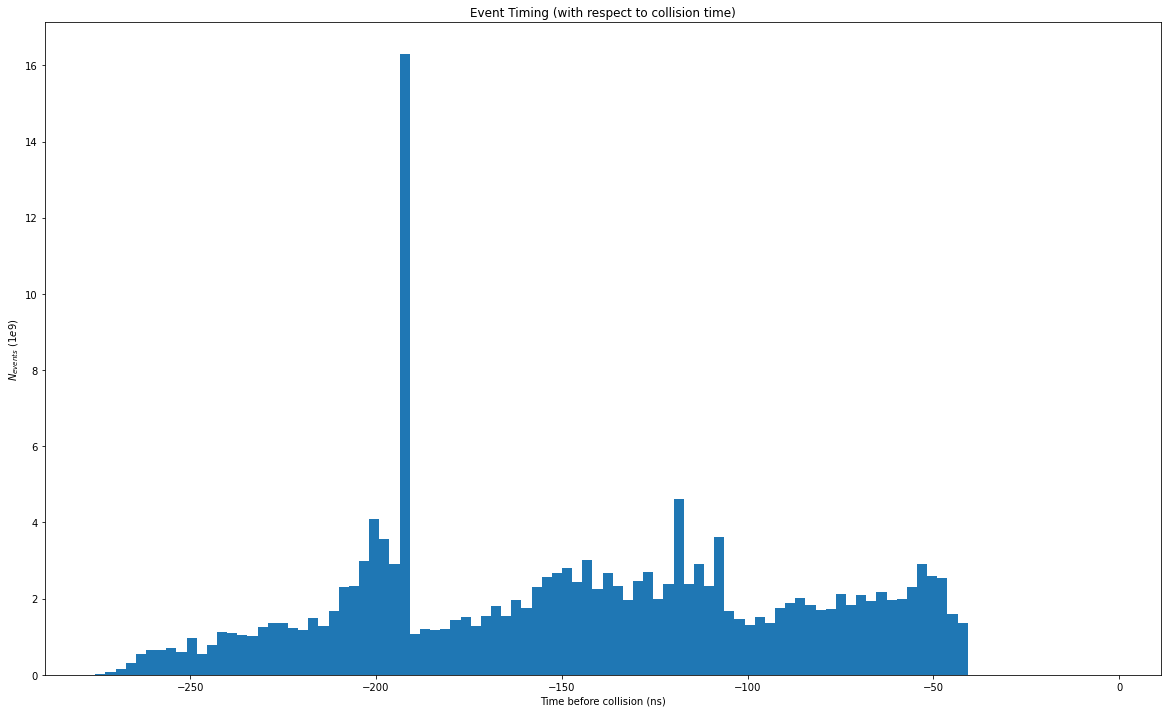

In [65]:
event_timing(sims)

In [66]:
x, y, z, w, time, _ = get_data(sims)

In [70]:
mask = (time > -200e-9) & (time < -180e-9)

(array([2.68776700e+09, 2.25243515e+09, 2.13250445e+09, 1.31254342e+10,
        4.15632508e+09, 6.51940111e+08, 9.23428375e+08, 8.90540385e+08,
        7.48782023e+08, 9.84069282e+08]),
 array([-1.99998909e-07, -1.97999454e-07, -1.95999999e-07, -1.94000545e-07,
        -1.92001090e-07, -1.90001636e-07, -1.88002181e-07, -1.86002726e-07,
        -1.84003272e-07, -1.82003817e-07, -1.80004362e-07]),
 <BarContainer object of 10 artists>)

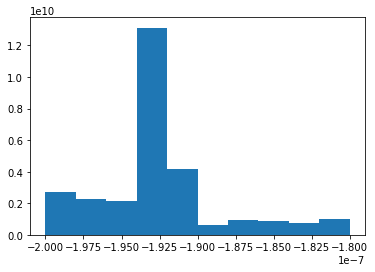

In [71]:
plt.hist(time[mask], weights = w[mask])

In [75]:
mask1 = (time > -1.9275e-07) & (time < -1.92001090e-07)

(array([2.88598854e+08, 5.40239018e+08, 6.59674307e+08, 6.29526240e+08,
        8.80783385e+08, 1.23817009e+09, 1.72783285e+09, 1.67993579e+09,
        2.08115698e+09, 1.69335550e+09]),
 array([-1.92747580e-07, -1.92673109e-07, -1.92598638e-07, -1.92524167e-07,
        -1.92449696e-07, -1.92375225e-07, -1.92300754e-07, -1.92226283e-07,
        -1.92151811e-07, -1.92077340e-07, -1.92002869e-07]),
 <BarContainer object of 10 artists>)

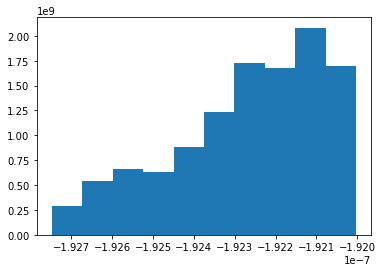

In [76]:
plt.hist(time[mask1], weights = w[mask1])

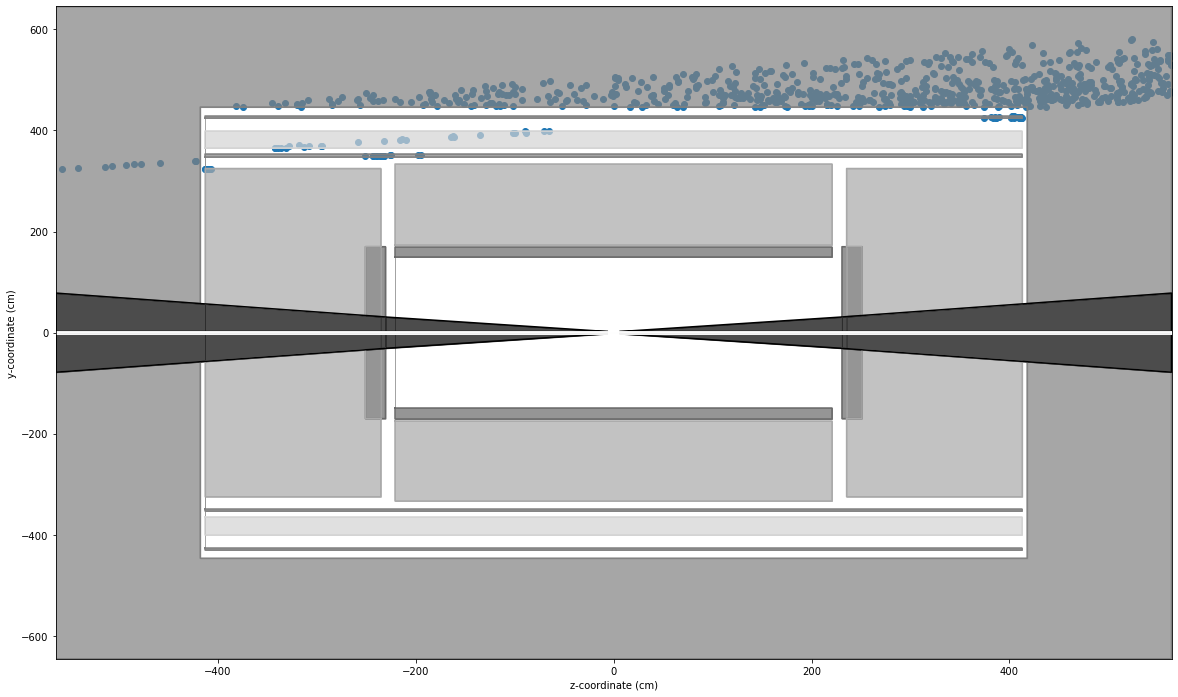

In [77]:
fig, ax = plt.subplots(figsize = (20,12))
ax.scatter(z[mask1], y[mask1])
plot_det('det_v2', ax)

In [24]:
get_GENIE_flux(sims, 'example')

Data has been written to fluxes/example.data.
